Error converting column 'Currency' to float.
Error converting column 'Date' to float.
Enter a currency name: xrp


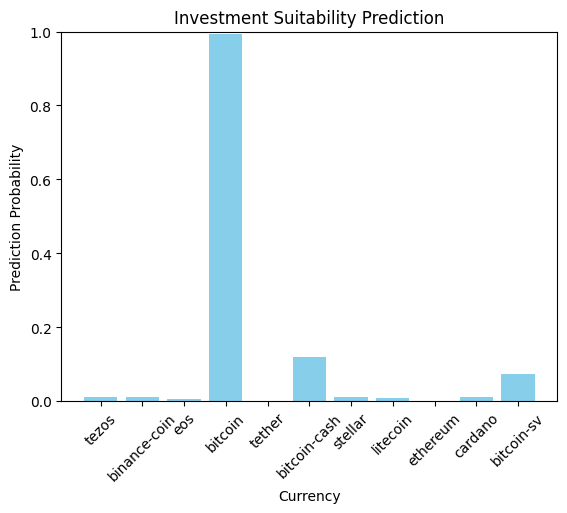

Predictions for currency xrp compared to other currencies:
tezos: Not good to invest
binance-coin: Not good to invest
eos: Not good to invest
bitcoin: Good to invest
tether: Not good to invest
bitcoin-cash: Not good to invest
stellar: Not good to invest
litecoin: Not good to invest
ethereum: Not good to invest
cardano: Not good to invest
bitcoin-sv: Not good to invest


In [1]:
#User input

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assume df is your DataFrame containing the cryptocurrency dataset
# Assume model is your trained logistic regression model

other_currencies_df = pd.DataFrame

def predict_currency(currency_name, model, df):
    # Data Preprocessing
    numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Filter DataFrame for the specified currency
    currency_df = df[df['Currency'] == currency_name]

    if len(currency_df) == 0:
        return "Currency not found", 0.0

    X_currency = currency_df.drop(columns=['Currency', 'Date'])

    if X_currency.shape[0] == 0:
        return "No data available for prediction", 0.0

    # Model Prediction
    prediction_percent = model.predict_proba(X_currency)[0][1]  # Probability of positive class (1)
    prediction = 'Good to invest' if prediction_percent >= 0.5 else 'Not good to invest'

    return prediction, prediction_percent


def compare_currencies(currency_name, model, df):
    global other_currencies_df
    # Filter DataFrame for currencies other than the input currency
    other_currencies_df = df[df['Currency'] != currency_name]

    if len(other_currencies_df) == 0:
        return "No other currencies found for comparison"

    # Extract currency names for comparison
    comparison_currency_names = other_currencies_df['Currency'].unique()

    predictions = []
    prediction_percents = []

    for comparison_currency_name in comparison_currency_names:
        prediction, prediction_percent = predict_currency(comparison_currency_name, model, df)
        predictions.append(prediction)
        prediction_percents.append(prediction_percent)

    # Visualization
    plt.bar(comparison_currency_names, prediction_percents, color='skyblue')
    plt.xlabel('Currency')
    plt.ylabel('Prediction Probability')
    plt.title('Investment Suitability Prediction')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

    return predictions, comparison_currency_names

# Example usage
df = pd.read_csv(r'consolidated_coin_data.csv')  # Load dataset

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split Data
X = df.drop(columns=['Currency', 'Date'])  # Features
y = df['Currency']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)  # Initialize model
model.fit(X_train, y_train)  # Train model

# Example usage
currency_name = input("Enter a currency name: ")

# Predictions for the entered currency and comparison with other currencies
predictions, comparison_currency_names = compare_currencies(currency_name, model, df)

# Output predictions
print(f"Predictions for currency {currency_name} compared to other currencies:")
for comparison_currency_name, prediction in zip(comparison_currency_names, predictions):
    print(f"{comparison_currency_name}: {prediction}")

Error converting column 'Currency' to float.
Error converting column 'Date' to float.
Enter a currency name: xrp


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-d55dff8b0ce4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_currencies_df['Cluster'] = cluster_labels


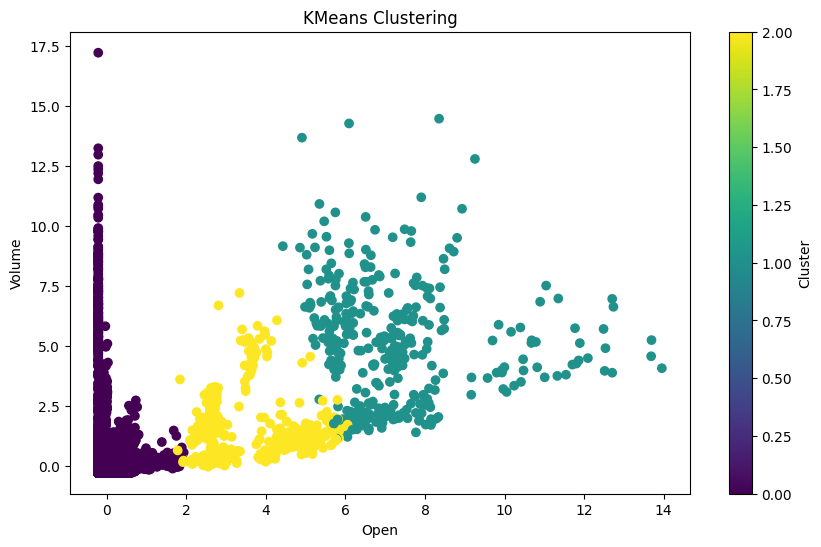

Streaming output truncated to the last 5000 lines.
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum: Cluster 0
ethereum:

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def compare_currencies_kmeans(currency_name, df, num_clusters=2):
    global other_currencies_df
    # Filter DataFrame for currencies other than the input currency
    other_currencies_df = df[df['Currency'] != currency_name]

    if len(other_currencies_df) == 0:
        return "No other currencies found for comparison"

    # Extract numerical features for clustering
    X_other_currencies = other_currencies_df.drop(columns=['Currency', 'Date'])

    # Initialize KMeans model
    kmeans = KMeans(n_clusters=3, random_state=42)

    # Fit KMeans model
    kmeans.fit(X_other_currencies)

    # Predict cluster labels
    cluster_labels = kmeans.predict(X_other_currencies)

    # Add cluster labels to DataFrame
    other_currencies_df['Cluster'] = cluster_labels

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_other_currencies['Open'], X_other_currencies['Volume'], c=cluster_labels, cmap='viridis')
    plt.xlabel('Open')
    plt.ylabel('Volume')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

    return other_currencies_df

# Example usage
df = pd.read_csv(r'consolidated_coin_data.csv')  # Load dataset

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

currency_name = input("Enter a currency name: ")

# Clustering for the entered currency and comparison with other currencies
clustered_df = compare_currencies_kmeans(currency_name, df, num_clusters=3)

# Output clustered currencies
print("Clustered currencies:")
for index, row in clustered_df.iterrows():
    print(f"{row['Currency']}: Cluster {row['Cluster']}")


Error converting column 'Currency' to float.
Error converting column 'Date' to float.
Enter a currency name: tezos


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-7-771cde840acd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_currencies_df['Cluster'] = cluster_labels


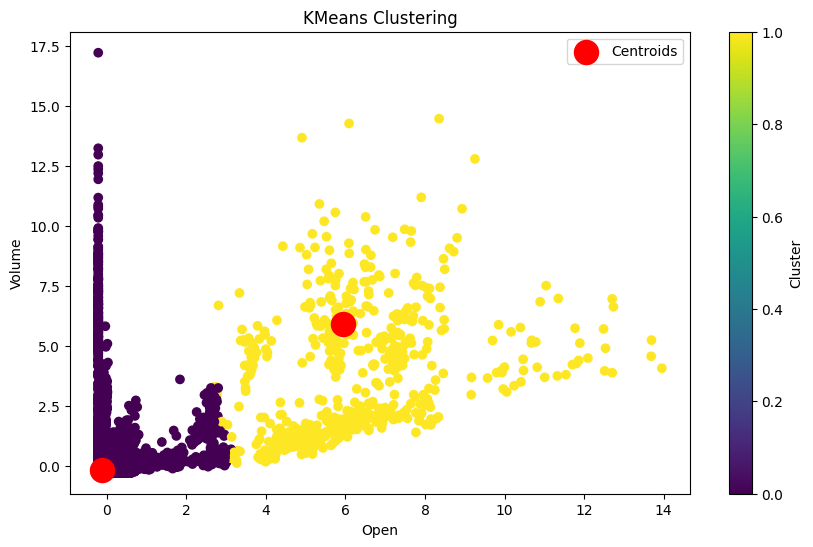

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def compare_currencies_kmeans(currency_name, df, num_clusters=2):
    global other_currencies_df
    # Filter DataFrame for currencies other than the input currency
    other_currencies_df = df[df['Currency'] != currency_name]

    if len(other_currencies_df) == 0:
        return "No other currencies found for comparison"

    # Extract numerical features for clustering
    X_other_currencies = other_currencies_df.drop(columns=['Currency', 'Date'])

    # Initialize KMeans model
    kmeans = KMeans(n_clusters=2, random_state=42)

    # Fit KMeans model
    kmeans.fit(X_other_currencies)

    # Predict cluster labels
    cluster_labels = kmeans.predict(X_other_currencies)

    # Add cluster labels to DataFrame
    other_currencies_df['Cluster'] = cluster_labels

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_other_currencies['Open'], X_other_currencies['Volume'], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.xlabel('Open')
    plt.ylabel('Volume')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

    return other_currencies_df

# Example usage
df = pd.read_csv(r'consolidated_coin_data.csv')  # Load dataset

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

currency_name = input("Enter a currency name: ")

# Clustering for the entered currency and comparison with other currencies
clustered_df = compare_currencies_kmeans(currency_name, df, num_clusters=3)

# Output clustered currencies
#print("Clustered currencies:")
#for index, row in clustered_df.iterrows():
#    print(f"{row['Currency']}: Cluster {row['Cluster']}")


Error converting column 'Currency' to float.
Error converting column 'Date' to float.
The currency with the highest precision is: tether


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


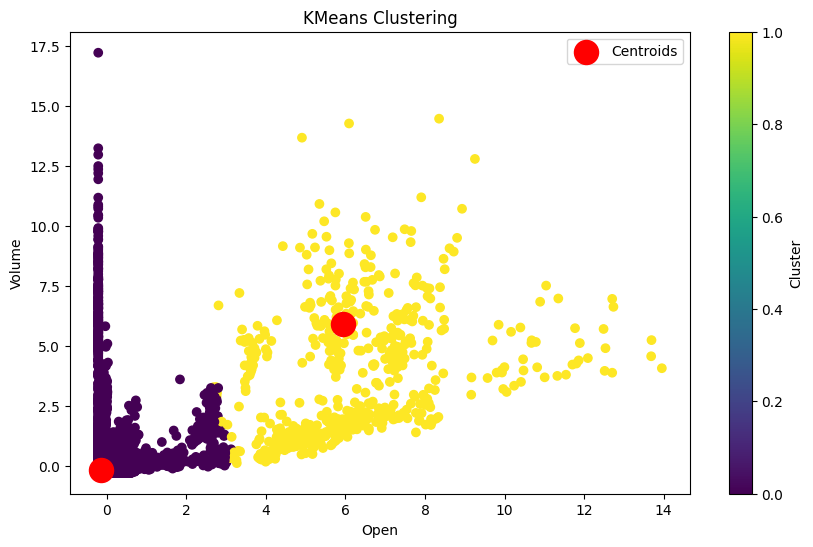

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'consolidated_coin_data.csv')

# Data Preprocessing
for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split Data
X = df.drop(columns=['Currency', 'Date'])  # Features
y = df['Currency']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate precision scores
precision_scores = precision_score(y_test, y_pred, average=None)
currency_labels = model.classes_

# Find currency with highest precision
best_currency_index = precision_scores.argmax()
best_currency = currency_labels[best_currency_index]

print(f"The currency with the highest precision is: {best_currency}")

# Use KMeans to cluster currencies
kmeans = KMeans(n_clusters=2, random_state=42)
X_clusters = df[numerical_cols]  # Using only numerical columns for clustering
kmeans.fit(X_clusters)

# Assign cluster labels to currencies
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_clusters['Open'], X_clusters['Volume'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Find currencies in the cluster with the best investment opportunities
best_cluster = df[df['Currency'] == best_currency]['Cluster'].iloc[0]
best_currencies = df[df['Cluster'] == best_cluster]['Currency']

#print(f"\nThe currencies with the best investment opportunities (in the same cluster as {best_currency}) are:")
#for currency in best_currencies:
#    print(currency)


Error converting column 'Currency' to float.
Error converting column 'Date' to float.
Overall Accuracy: 0.3157712903783037

Classification Report:
              precision    recall  f1-score   support

binance-coin       0.34      0.08      0.13       480
     bitcoin       0.75      0.67      0.71       504
bitcoin-cash       0.31      0.32      0.31       483
  bitcoin-sv       0.27      0.13      0.17       468
     cardano       0.23      0.12      0.16       496
         eos       0.48      0.18      0.26       473
    ethereum       0.79      0.41      0.55       494
    litecoin       0.75      0.25      0.38       506
     stellar       0.20      0.07      0.10       468
      tether       0.84      0.35      0.49       485
       tezos       0.12      0.77      0.21       447
         xrp       0.49      0.44      0.46       485

    accuracy                           0.32      5789
   macro avg       0.47      0.32      0.33      5789
weighted avg       0.47      0.32      0.

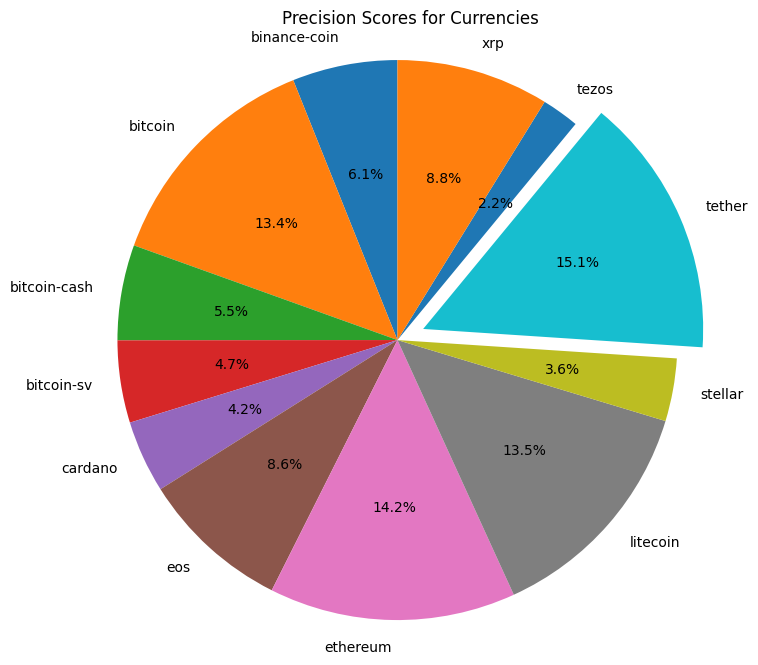

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from matplotlib import pyplot as plt


# Assume df is your DataFrame containing the cryptocurrency dataset

# Data Preprocessing
# Convert date column to numerical format (e.g., timestamps)
# Convert categorical variables to numerical representations if necessary (e.g., one-hot encoding)
# Normalize numerical columns

df = pd.read_csv(r'consolidated_coin_data.csv')

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split Data
X = df.drop(columns=['Currency', 'Date'])  # Features
y = df['Currency']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
accuracy = model.score(X_test, y_test)
print("Overall Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get precision scores from classification report
#precision_scores = classification_report(y_test, y_pred, output_dict=True)['precision']

# Find currency with highest precision
#best_currency = max(precision_scores, key=lambda x: precision_scores[x])

#print(f"The currency with the highest precision is: {best_currency}")

# Calculate precision scores
precision_scores = precision_score(y_test, y_pred, average=None)
currency_labels = model.classes_

# Find currency with highest precision
best_currency_index = precision_scores.argmax()
best_currency = currency_labels[best_currency_index]

print(f"The currency with the highest precision is: {best_currency}")


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = currency_labels
sizes = precision_scores
explode = [0.1 if label == best_currency else 0 for label in labels]  # Explode the currency with the highest precision

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Precision Scores for Currencies')
plt.show()


R-squared: 0.999688000884245
Mean Squared Error: 576.9103093736466


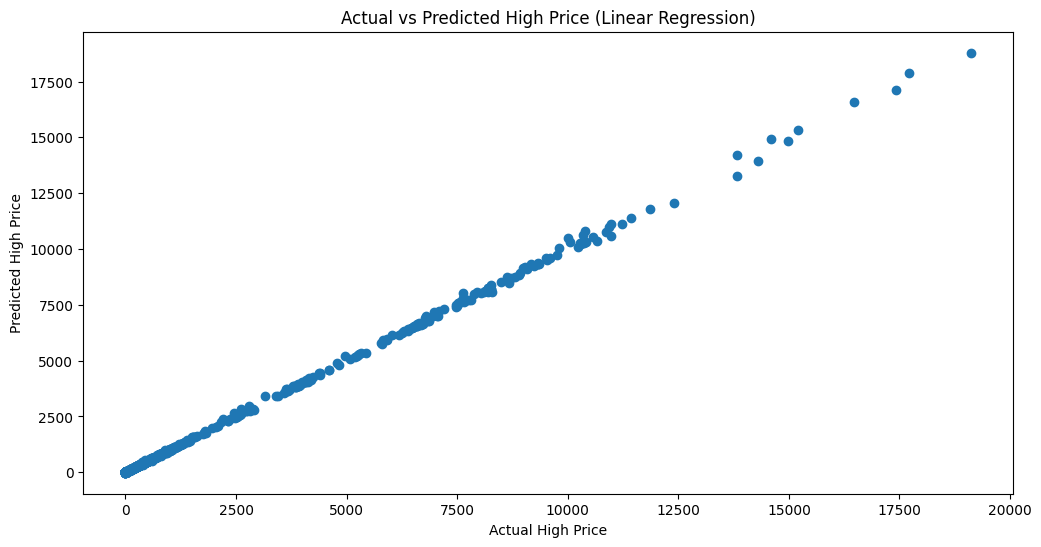

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('consolidated_coin_data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.dropna(inplace=True)

# Remove commas from numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True)

# Convert columns to float
df[numeric_cols] = df[numeric_cols].astype(float)

# Split Data
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual High Price')
plt.ylabel('Predicted High Price')
plt.title('Actual vs Predicted High Price (Linear Regression)')
plt.show()


Error converting column 'Currency' to float.
Error converting column 'Date' to float.
R-squared: 1.0
The currency with the highest precision is: tezos with R-squared: 1.0


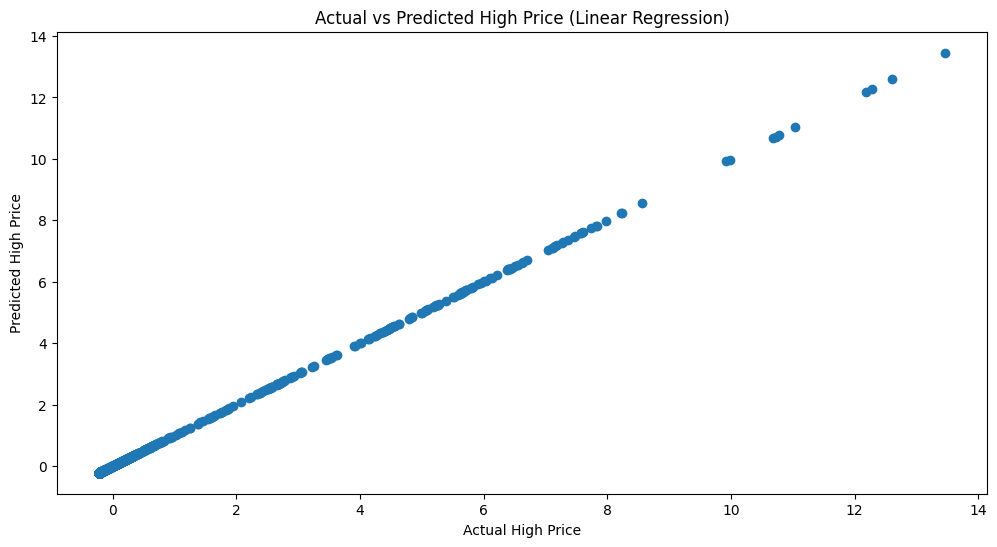

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'consolidated_coin_data.csv')

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',', '').astype(float)
    except ValueError:
        print(f"Error converting column '{column}' to float.")

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split Data
X = df.drop(columns=['Currency', 'Date'])  # Features
y = df['High']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Find the currency with the highest precision
currency_labels = df['Currency'].unique()
currency_r2_scores = {}

for currency in currency_labels:
    currency_df = df[df['Currency'] == currency]
    X_curr = currency_df.drop(columns=['Currency', 'Date'])
    y_curr = currency_df['High']

    r2_curr = model.score(X_curr, y_curr)
    currency_r2_scores[currency] = r2_curr

best_currency = max(currency_r2_scores, key=currency_r2_scores.get)
best_currency_r2 = currency_r2_scores[best_currency]

print(f"The currency with the highest precision is: {best_currency} with R-squared: {best_currency_r2}")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual High Price')
plt.ylabel('Predicted High Price')
plt.title('Actual vs Predicted High Price (Linear Regression)')
plt.show()
